# Notebook to create examplary plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Adjust path if the package is not installed
import sys
sys.path.append('.')  # Assumes root contains battery_ocv_toolbox/
# Import the package
from ocv_teaching import OCV, ActiveMaterial, OCVBlending, CellOCVReconstruction
from ocv_teaching.plot_ocv import plot_ocv
from ocv_teaching.utils import interpolate

## Load data

In [2]:
NCM811_df = pd.read_csv('../ocv_data/NMC811_half_cell_ocv.csv')
Graphite_df = pd.read_csv('../ocv_data/Graphite_half_cell_ocv.csv')

## 2. Instantiate OCV and ActiveMaterial objects 

In [3]:
NCM811_ocv = OCV(NCM811_df["SOC"], NCM811_df["Voltage"], NCM811_df["Voltage"])
Graphite_ocv = OCV(Graphite_df["SOC"], Graphite_df["Voltage"], Graphite_df["Voltage"])
NCM811_mat = ActiveMaterial(NCM811_ocv, specific_capacity=212, formation_loss=0.09)
Graphite_mat = ActiveMaterial(Graphite_ocv, specific_capacity=372, formation_loss=0.08)


# 3. Reconstruct full cell

In [4]:
ocv_rec = CellOCVReconstruction(NCM811_mat, Graphite_mat)
an0, cath0, an1, cath1=ocv_rec.get_stoichiometries(np_ratio=1.1, v_min=3, v_max=4.2)

Plot the full cell by creating ocvs

In [5]:
volt_cell_cha,volt_cath_cha,volt_an_cha=ocv_rec.reconstruct_voltage(an0, cath0, an1, cath1,direction="charge")

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='Stat of charge (SoC)', ylabel='Voltage (V)'>)

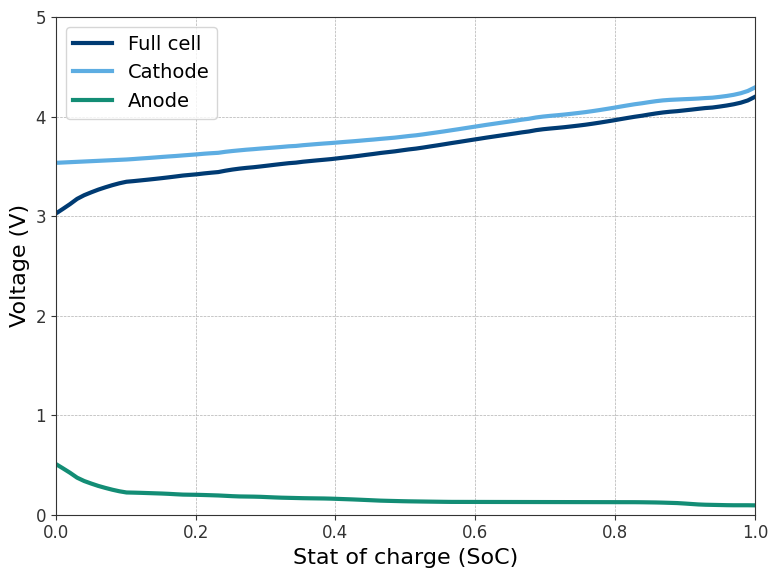

In [7]:
soc_vec = np.linspace(0, 1, 100)
curves = [{'x': soc_vec, 'y': volt_cell_cha,'label': "Full cell"},
          {'x': soc_vec, 'y': volt_cath_cha, 'label': "Cathode"},
          {'x': soc_vec, 'y': volt_an_cha, 'label': "Anode"}]
plot_ocv(curves, 
         x_label='Stat of charge (SoC)', 
         y_label='Voltage (V)', 
         x_lim=[0, 1], 
         y_lim=[0, 5], 
         legend_loc='best', 
         figsize=(8, 6), 
         grid=True)